In [1]:
%matplotlib inline

In [724]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from shapely.geometry import LineString
from folium import Map, GeoJson, vector_layers, FeatureGroup
from folium.plugins import FastMarkerCluster
sns.set(style="darkgrid")

In [220]:
dataset = pd.read_excel(r'D:/UniSalzburg/Data Science/assignment/data/atlantic_revised_reduced.xlsx')

## EDA

#### Explore dataset in general

In [4]:
dataset.head()

,ID,Name,Date original,Year,Month,Day,Date,Time,time hours,Event,Status,Latitude,Longitude,Lat,Lon,NS,EW,Maximum Wind,Minimum Pressure
0,AL011900,UNNAMED,19000827,1900,8,27,27/08/1900,0,00:00:00,,TS,15.0N,42.1W,15.0,-42.1,N,W,35,-999
1,AL011900,UNNAMED,19000827,1900,8,27,27/08/1900,600,06:00:00,,TS,15.2N,43.4W,15.2,-43.4,N,W,35,-999
2,AL011900,UNNAMED,19000827,1900,8,27,27/08/1900,1200,12:00:00,,TS,15.3N,44.7W,15.3,-44.7,N,W,35,-999
3,AL011900,UNNAMED,19000827,1900,8,27,27/08/1900,1800,18:00:00,,TS,15.4N,45.6W,15.4,-45.6,N,W,35,-999
4,AL011900,UNNAMED,19000828,1900,8,28,28/08/1900,0,1900-01-01 00:00:00,,TS,15.6N,46.6W,15.6,-46.6,N,W,35,-999


In [26]:
dataset.dtypes

ID                   object
Name                 object
Date original         int64
Year                  int64
Month                 int64
Day                   int64
Date                 object
Time                  int64
time hours           object
Event                object
Status               object
Latitude             object
Longitude            object
Lat                 float64
Lon                 float64
NS                   object
EW                   object
Maximum Wind          int64
Minimum Pressure      int64
dtype: object

**Look at numerical variables stats**

In [5]:
dataset.describe()

,Date original,Year,Month,Day,Time,Lat,Lon,Maximum Wind,Minimum Pressure
count,3.987700e+04,39877.000000,39877.000000,39877.000000,39877.000000,39877.000000,39877.000000,39877.000000,39877.000000
mean,1.965698e+07,1965.608998,8.708153,15.711814,911.110063,26.789300,-64.867565,49.209444,-86.453118
std,3.267734e+05,32.677684,1.376685,8.784011,671.275656,10.117583,20.285841,28.382324,992.337123
min,1.900083e+07,1900.000000,1.000000,1.000000,0.000000,7.200000,-359.100000,-99.000000,-999.000000
25%,1.939103e+07,1939.000000,8.000000,8.000000,600.000000,18.800000,-81.000000,30.000000,-999.000000
50%,1.969093e+07,1969.000000,9.000000,16.000000,1200.000000,26.200000,-66.900000,45.000000,-999.000000
75%,1.995092e+07,1995.000000,9.000000,23.000000,1800.000000,33.000000,-50.800000,65.000000,997.000000
max,2.015111e+07,2015.000000,12.000000,31.000000,2330.000000,81.000000,63.000000,165.000000,1024.000000


We can see that dataset consists of 39877 rows and includes observations from 1900 to 2015. Something strange with minimum longitude values, most likely an error. Also maximum latitude values a bit suspicious. Missing values for Maximum Wind variable are marked as -99, for Minimum Pressure as -999.

In [218]:
dataset[dataset.Lon < -180]

,ID,Name,Date original,Year,Month,Day,Date,Time,time hours,Event,...,Latitude,Longitude,Lat,Lon,NS,EW,Maximum Wind,Minimum Pressure,datetime,cumulative_hours
13756,AL051952,UNNAMED,19520914,1952,9,14,1952-09-14,600,00:00:00,,...,43.2N,359.1W,43.2,-359.1,N,W,35,-999,1952-09-14 00:00:00,126
13757,AL051952,UNNAMED,19520914,1952,9,14,1952-09-14,1200,06:00:00,,...,44.0N,358.4W,44.0,-358.4,N,W,35,-999,1952-09-14 06:00:00,132


So only 2 rows appeared to have wrong longitude values, so they can be filtered without significant data loss.

**Look at categorical values stats**

In [1058]:
dataset[["NS","EW","Event","Status"]].describe()

,NS,EW,Event,Status
count,39875,39875,39875,39875
unique,1,2,10,9
top,N,W,,TS
freq,39875,39827,39102,13848


In [1066]:
dataset[dataset["EW"]=="E"].count()

ID                  48
Name                48
Date original       48
Year                48
Month               48
Day                 48
Date                48
Time                48
time hours          48
Event               48
Status              48
Latitude            48
Longitude           48
Lat                 48
Lon                 48
NS                  48
EW                  48
Maximum Wind        48
Minimum Pressure    48
datetime            48
cumulative_hours    48
geometry            48
dtype: int64

In [1059]:
dataset["Event"].unique(),dataset["Status"].unique()

(array(['  ', ' L', ' R', ' I', ' P', ' W', ' C', ' S', ' G', ' T'],
       dtype=object),
 array([' TS', ' HU', ' TD', ' EX', ' LO', ' DB', ' SD', ' SS', ' WV'],
       dtype=object))

In [626]:
dataset["NS"].unique(), dataset["EW"].unique()

(array(['N'], dtype=object), array(['W', 'E'], dtype=object))

Number of observations by the event's status 

Text(0.5, 0, 'Month')

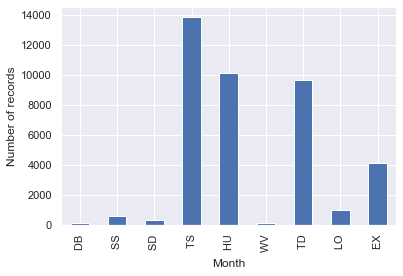

In [209]:
type_plot = dataset["Status"].value_counts(sort=False).plot(kind="bar")
type_plot.set_ylabel("Number of records")
type_plot.set_xlabel("Event type") 

Variety of categorical variables is not rich at all, NS variable has only N values, most values of EW variable has W. So all storms went to the north and to the west. Only 48 observations have east direction. Event variable is mostly empty. The only informative variable is Status, which describes type of the event - tropical storm, hurricane, tropical depression and so on.

**Look at geography**

Filter out wrong longitude values

In [222]:
dataset = dataset[dataset.Lon >= -180]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


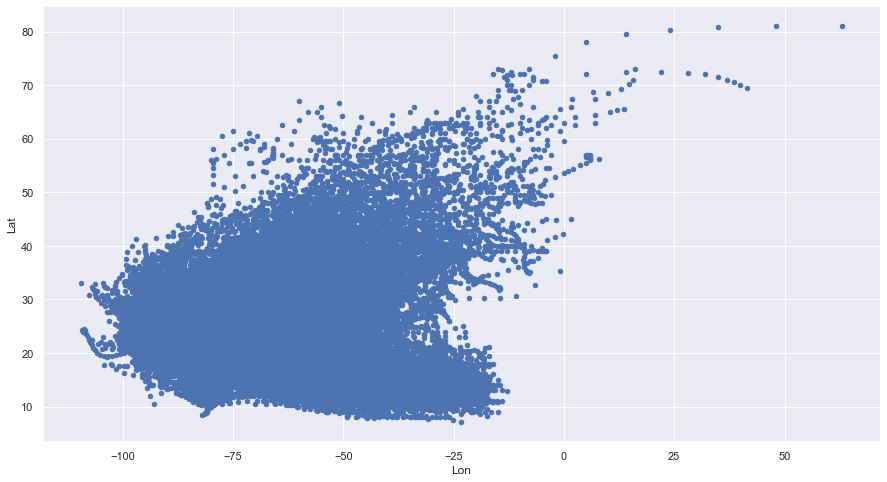

In [380]:
dataset.plot.scatter(x="Lon",y="Lat",figsize=(15,8))

Build trajectories

In [919]:
geodataset = gpd.GeoDataFrame(
    dataset, geometry=gpd.points_from_xy(dataset.Lon, dataset.Lat))

In [926]:
trajectories_geodataset = geodataset.groupby("ID")['geometry'].apply(lambda x: LineString(x.tolist()))

In [928]:
trajectories_geodataset = gpd.GeoDataFrame(trajectories_geodataset, geometry='geometry')

In [1210]:
m = Map(
    location=[40, -40],
    zoom_start=3,
    tiles='Stamen Terrain'
)

In [1211]:
GeoJson(
    trajectories_geodataset["geometry"].to_json(),
    name='huricanes',
    style_function = lambda x: {
    "opacity": 0.2
    }
).add_to(m)

In [1212]:
m

Looking at spatial distribution and trajectories it seems that bearing variables NS and EW describe behaviour of the events not precise enough.  

#### Explore wind speed and pressure

Histogram for all pressure values

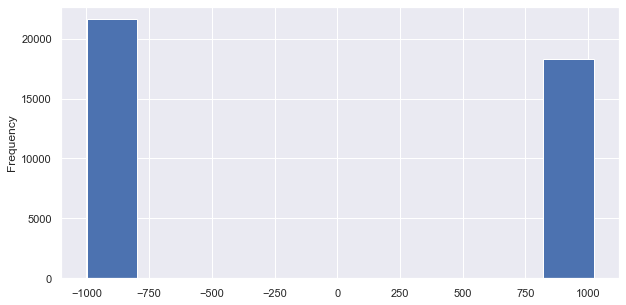

In [8]:
dataset['Minimum Pressure'].plot(kind='hist',figsize=(10,5))

Histogram for filtered pressure without no data values

Text(0.5, 0, 'Pressure')

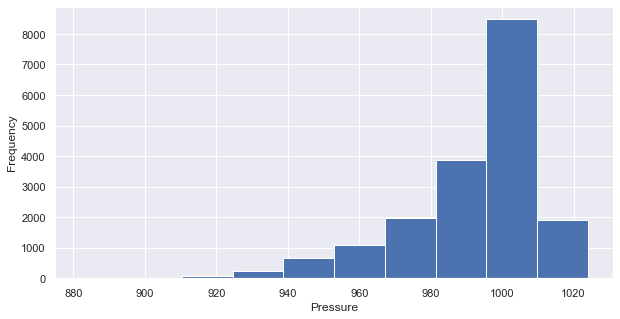

In [208]:
p_plot = dataset["Minimum Pressure"][dataset["Minimum Pressure"] != -999].plot(kind='hist',figsize=(10,5))
p_plot.set_xlabel("Pressure")

Number of records with missing pressure values - more than half of the dataset.

In [10]:
len(dataset[dataset["Minimum Pressure"] == -999])

21604

Histogram for all wind speed values

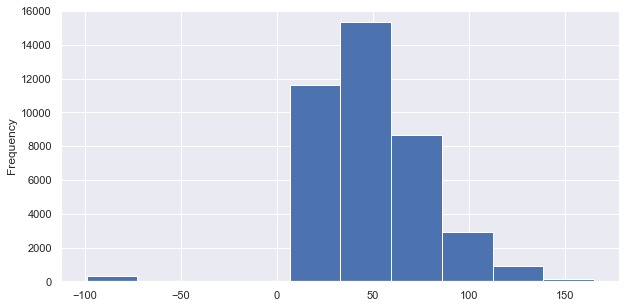

In [11]:
dataset['Maximum Wind'].plot(kind='hist',figsize=(10,5))

Histogram for filtered Maximum wind without no data values

Text(0.5, 0, 'Wind speed')

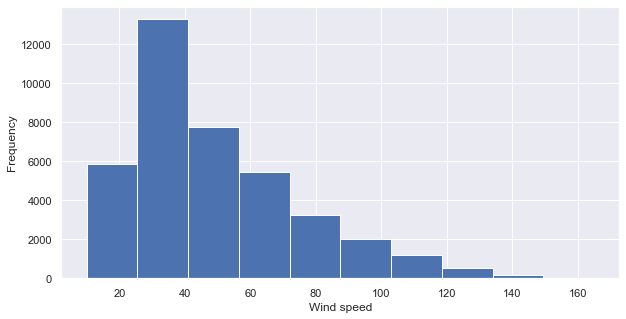

In [206]:
w_plot = dataset['Maximum Wind'][dataset["Maximum Wind"] != -99].plot(kind='hist',figsize=(10,5))
w_plot.set_xlabel("Wind speed") 

Number of records with missing wind speed values.

In [12]:
len(dataset[dataset["Maximum Wind"] == -99])

338

It is seen that both Maximum wind and Pressure values distributions are skewed from normal distribution. 

Wind to pressure scatterplot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


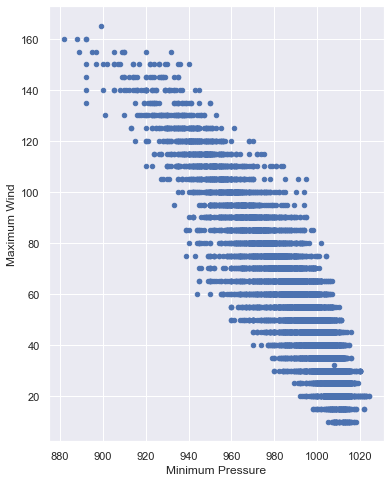

In [190]:
dataset[(dataset["Minimum Pressure"] != -999) & (dataset["Maximum Wind"] != -99)].plot.scatter(x="Minimum Pressure",y="Maximum Wind",figsize=(6,8))

The variables have clear linear correlation. So it is possible to predict all missing pressure values using wind speed 
simple machine learning model with linear regression. 

#### Seasonality

Text(0.5, 0, 'Month')

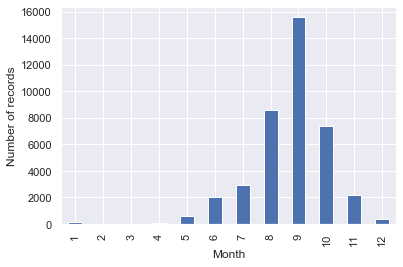

In [205]:
s_plot = dataset["Month"].value_counts(sort=False).plot(kind="bar")
s_plot.set_ylabel("Number of records")
s_plot.set_xlabel("Month") 

Most of the events happened in August, September and October. The variable might be used for predictions.

#### Explore events

Unique events by ID

In [32]:
len(pd.unique(dataset["ID"]))

1443

Unique events by Name

In [210]:
len(pd.unique(dataset["Name"]))

288

In [213]:
dataset['Name'].value_counts().head(50).to_frame().reset_index()

,index,Name
0,UNNAMED,17335
1,FRANCES,317
2,ARLENE,283
3,BERTHA,268
4,DENNIS,255
5,FLORENCE,249
6,HELENE,240
7,IRENE,231
8,EMILY,225
9,BONNIE,217


So looks like almost half of the observations do not have particular name and ID should be used for grouping

In [1073]:
named_dataset = dataset[~dataset['Name'].str.contains('UNNAMED')]

Among named events storm Frances has the biggest number observations

In [1075]:
named_dataset['Name'].value_counts().head(50).to_frame().reset_index()

,index,Name
0,FRANCES,317
1,ARLENE,283
2,BERTHA,268
3,DENNIS,255
4,FLORENCE,249
5,HELENE,240
6,IRENE,231
7,EMILY,225
8,BONNIE,217
9,CLAUDETTE,214


But they distributed among several years

In [1081]:
named_dataset[named_dataset['Name'].str.contains('FRANCES')].groupby(['Year']).count()

,ID,Name,Date original,Month,Day,Date,Time,time hours,Event,Status,...,Longitude,Lat,Lon,NS,EW,Maximum Wind,Minimum Pressure,datetime,cumulative_hours,geometry
Year,,,,,,,,,,,,,,,,,,,,,
1961,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
1968,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
1976,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
1980,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
1986,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
1992,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
1998,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
2004,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75


### Further data processing 

#### Get usable time data for each event

**Convert hours to proper fromat**

First 4 rows in time hours column are in time format, while others in datetime

In [123]:
dataset['time hours']

0                   00:00:00
1                   06:00:00
2                   12:00:00
3                   18:00:00
4        1900-01-01 00:00:00
                ...         
39872    1927-04-16 00:00:00
39873    1927-04-16 06:00:00
39874    1927-04-16 12:00:00
39875    1927-04-16 18:00:00
39876    1927-04-17 00:00:00
Name: time hours, Length: 39877, dtype: object

Unify them

In [225]:
dataset['time hours'].iloc[4:] = dataset['time hours'].iloc[4:].dt.time

**Get proper datetime field**

In [226]:
dataset["Date"] = pd.to_datetime(dataset["Date"], format='%d/%m/%Y')

In [227]:
dataset["datetime"] = dataset.apply(lambda x: dt.datetime.combine(x["Date"],x['time hours']),axis=1)

In [228]:
dataset["datetime"].head(10)

0   1900-08-27 00:00:00
1   1900-08-27 06:00:00
2   1900-08-27 12:00:00
3   1900-08-27 18:00:00
4   1900-08-28 00:00:00
5   1900-08-28 06:00:00
6   1900-08-28 12:00:00
7   1900-08-28 18:00:00
8   1900-08-29 00:00:00
9   1900-08-29 06:00:00
Name: datetime, dtype: datetime64[ns]

**Get cumulative hours for each event**

It would be useful to have cumulative timing for each observation for the particular event. Then we will have variable on the event's lifecycle which can be used in the models.

In [229]:
dataset["cumulative_hours"] = 0

To get this variable for each event ID the time difference between the first observation and each subsequent observation is calculated. 

In [230]:
for group,frame in dataset.groupby("ID"):
    dataset["cumulative_hours"].loc[dataset["ID"] == group] = frame.apply(lambda x: int((x["datetime"] - frame["datetime"].iloc[0]).total_seconds()/3600),axis = 1)
    

C:\Users\Iam\Anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [231]:
dataset[["ID","datetime","cumulative_hours"]].head(30)

,ID,datetime,cumulative_hours
0,AL011900,1900-08-27 00:00:00,0
1,AL011900,1900-08-27 06:00:00,6
2,AL011900,1900-08-27 12:00:00,12
3,AL011900,1900-08-27 18:00:00,18
4,AL011900,1900-08-28 00:00:00,24
5,AL011900,1900-08-28 06:00:00,30
6,AL011900,1900-08-28 12:00:00,36
7,AL011900,1900-08-28 18:00:00,42
8,AL011900,1900-08-29 00:00:00,48
9,AL011900,1900-08-29 06:00:00,54


Graphs below shows wind speed values during lifecycle of the event for the Frances storm in different years. The pattern is clearly seen - wind speed is increasing at first and then decreasing further along the event development. So constructed variable indeed may be useful for some predictions.  

In [187]:
grouped_frances = dataset[dataset.Name.str.contains("FRANCES")].sort_values(by=["datetime"]).groupby('Year', as_index=False)

0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

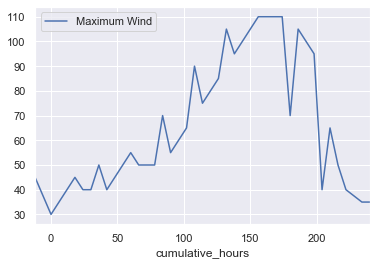

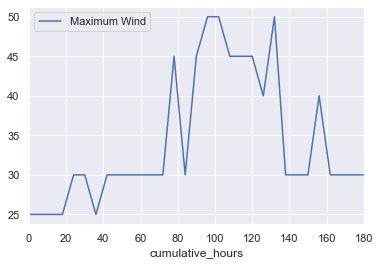

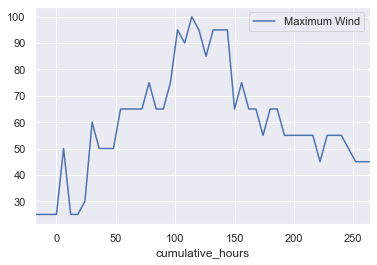

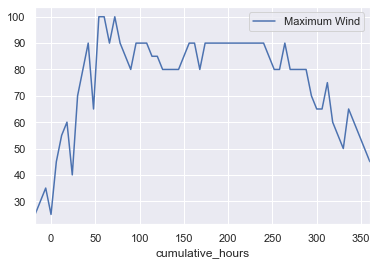

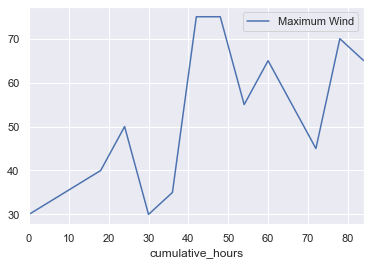

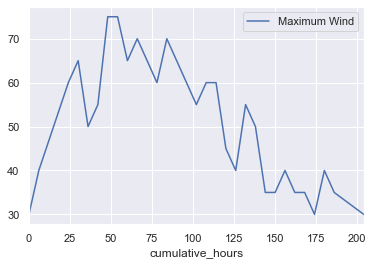

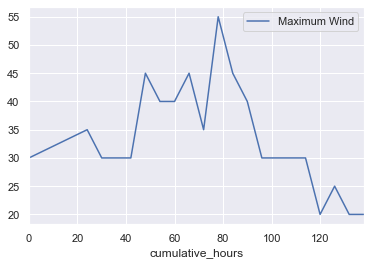

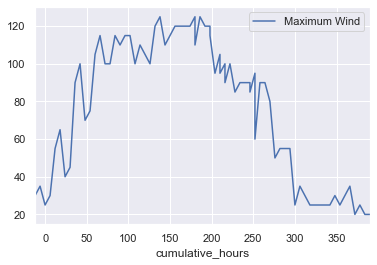

In [194]:
grouped_frances.plot(x="cumulative_hours",y="Maximum Wind")

## Predictions

#### General data preparation 

Function to generate time series (from [here](https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/))

In [297]:
def series_to_supervised(data, col_names, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('{}(t-{})'.format(col_names[j], i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('{}(t)'.format(col_names[j])) for j in range(n_vars)]
		else:
			names += [('{}(pt+{})'.format(col_names[j], i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

Leave only potentially useful variables for predictions

In [249]:
dataset.columns.values

array(['ID', 'Name', 'Date original', 'Year', 'Month', 'Day', 'Date',
       'Time', 'time hours', 'Event', 'Status', 'Latitude', 'Longitude',
       'Lat', 'Lon', 'NS', 'EW', 'Maximum Wind', 'Minimum Pressure',
       'datetime', 'cumulative_hours'], dtype=object)

In [233]:
working_dataset = dataset[["ID","Month","Status","Lat","Lon","NS","EW","Maximum Wind","cumulative_hours"]]

In [235]:
working_dataset = working_dataset.sort_values(by=["ID","cumulative_hours"])

Generate dataset for ML and DL models. For each event id generate blocks of values for the last 24 hours and next 6 hours 

In [298]:
full_working_series = pd.DataFrame()
for group,frame in working_dataset.groupby("ID"):
    frame_series = series_to_supervised(frame.values,col_names=working_dataset.columns.values,n_in=4,n_out=2)
    full_working_series = full_working_series.append(frame_series)

In [272]:
full_working_series.head()

,ID(t-4),Month(t-4),Status(t-4),Lat(t-4),Lon(t-4),NS(t-4),EW(t-4),Maximum Wind(t-4),cumulative_hours(t-4),ID(t-3),...,cumulative_hours(t-1),ID(t),Month(t),Status(t),Lat(t),Lon(t),NS(t),EW(t),Maximum Wind(t),cumulative_hours(t)
4,AL011900,8,TS,15,-42.1,N,W,35,0,AL011900,...,18,AL011900,8,TS,15.6,-46.6,N,W,35,24
5,AL011900,8,TS,15.2,-43.4,N,W,35,6,AL011900,...,24,AL011900,8,TS,15.8,-47.9,N,W,35,30
6,AL011900,8,TS,15.3,-44.7,N,W,35,12,AL011900,...,30,AL011900,8,TS,16,-49.1,N,W,35,36
7,AL011900,8,TS,15.4,-45.6,N,W,35,18,AL011900,...,36,AL011900,8,TS,16.1,-50.3,N,W,35,42
8,AL011900,8,TS,15.6,-46.6,N,W,35,24,AL011900,...,42,AL011900,8,TS,16.3,-51.4,N,W,35,48


### Machine Learning

#### Prediction of bearing (Classification)

Prediction of bearing based on NS EW variables appeared to be useless due to inadequate values in the dataset. It was dicovered after this part was perfomed, so I left it as it is.

**Prepare training and test sets**
For prediction of East or West bearing in the next 6 hours we will use previous 5 observations of East or West bearing and 
hours since event starts.

In [588]:
classification_data = full_working_series.filter(regex="cumulative|EW",axis=1)

In [589]:
classification_data = classification_data[classification_data.columns.sort_values(ascending=False).values]

In [592]:
classification_data.head()

,cumulative_hours(t-4),cumulative_hours(t-3),cumulative_hours(t-2),cumulative_hours(t-1),cumulative_hours(t),cumulative_hours(pt+1),EW(t-4),EW(t-3),EW(t-2),EW(t-1),EW(t),EW(pt+1)
4,0,6,12,18,24,30,W,W,W,W,W,W
5,6,12,18,24,30,36,W,W,W,W,W,W
6,12,18,24,30,36,42,W,W,W,W,W,W
7,18,24,30,36,42,48,W,W,W,W,W,W
8,24,30,36,42,48,54,W,W,W,W,W,W


In [590]:
X = classification_data.iloc[:,[0,1,2,3,4,6,7,8,9,10]].values
y = classification_data.iloc[:,[11]].values

Encode categorical variables for X and y

In [351]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [593]:
X_ctEW = ColumnTransformer([('encoder', OneHotEncoder(), [6,7,8,9,10])], remainder='passthrough')
y_ctEW = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ctEW.fit_transform(X)
#y = y_ctNS.fit_transform(y)
y = y_ctEW.fit_transform(y)

In [594]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Scale numeric variables

In [595]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Split data to train and test

In [358]:
from sklearn.model_selection import train_test_split

In [596]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fit the model

In [402]:
from sklearn.ensemble import RandomForestClassifier

In [597]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Predict bearing values for the test set

In [598]:
y_pred = classifier.predict(X_test)

Evaluate the model

In [428]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [599]:
cm = multilabel_confusion_matrix(y_test, y_pred)

Confusion matrix for predicted values

In [600]:
cm

array([[[6522,    1],
        [   3,    8]],

       [[   8,    3],
        [   1, 6522]]], dtype=int64)

In [601]:
accuracy_score(y_test, y_pred)

0.9993878175696358

The model is extremely accurate, but totally useless because of chosen inadequte variables in the dataset

#### Prediction of position (Regression)

**Prepare training and test sets**
For prediction of Lat or West bearing in the next 6 hours we will use previous 5 observations of latitude and longitude and 
hours since event starts.

In [603]:
regression_data = full_working_series.filter(regex="cumulative|Lat|Lon",axis=1)

In [604]:
regression_data = regression_data[regression_data.columns.sort_values(ascending=False).values]

In [456]:
regression_data.head()

,cumulative_hours(t-4),cumulative_hours(t-3),cumulative_hours(t-2),cumulative_hours(t-1),cumulative_hours(t),cumulative_hours(pt+1),Lon(t-4),Lon(t-3),Lon(t-2),Lon(t-1),Lon(t),Lon(pt+1),Lat(t-4),Lat(t-3),Lat(t-2),Lat(t-1),Lat(t),Lat(pt+1)
4,0,6,12,18,24,30,-42.1,-43.4,-44.7,-45.6,-46.6,-47.9,15,15.2,15.3,15.4,15.6,15.8
5,6,12,18,24,30,36,-43.4,-44.7,-45.6,-46.6,-47.9,-49.1,15.2,15.3,15.4,15.6,15.8,16
6,12,18,24,30,36,42,-44.7,-45.6,-46.6,-47.9,-49.1,-50.3,15.3,15.4,15.6,15.8,16,16.1
7,18,24,30,36,42,48,-45.6,-46.6,-47.9,-49.1,-50.3,-51.4,15.4,15.6,15.8,16,16.1,16.3
8,24,30,36,42,48,54,-46.6,-47.9,-49.1,-50.3,-51.4,-52.4,15.6,15.8,16,16.1,16.3,16.4


In [605]:
X = regression_data.iloc[:,[0,1,2,3,4,6,7,8,9,10,12,13,14,15,16]].values
y = regression_data.iloc[:,[11,17]].values

Split data to train and test

In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Scale variables

In [607]:
y_train_lon = y_train[:,0].reshape(-1,1)
y_train_lat = y_train[:,1].reshape(-1,1)

In [608]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y_lon = StandardScaler()
sc_y_lat = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
y_train_lon = sc_y_lon.fit_transform(y_train_lon)
y_train_lat = sc_y_lat.fit_transform(y_train_lat)

In [550]:
y_train_lon

array([[-0.49106148],
       [ 0.10753202],
       [ 0.08238103],
       ...,
       [-2.14096624],
       [-0.77275253],
       [ 0.72121611]])

In [552]:
sc_y.inverse_transform(y_train_lat)

array([[-84.96048471],
       [-77.54374838],
       [-87.69296652],
       ...,
       [-75.98233021],
       [-94.91452557],
       [-90.62062559]])

Two methdos are tested - Support Vector Machine with gaussian kernel and Random Forrest Regression, 100 runs with random chunks of train data. Latitude and longitude are predicted separately

Fit models for longitude

In [609]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
svr_regressor_lon = SVR(kernel = 'rbf')
rf_regressor_lon = RandomForestRegressor(n_estimators = 100, random_state = 0)

svr_regressor_lon.fit(X_train, y_train_lon)
rf_regressor_lon.fit(X_train, y_train_lon)

C:\Users\Iam\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Iam\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Fit models for latitude

In [610]:
svr_regressor_lat = SVR(kernel = 'rbf')
rf_regressor_lat = RandomForestRegressor(n_estimators = 100, random_state = 0)

svr_regressor_lat.fit(X_train, y_train_lat)
rf_regressor_lat.fit(X_train, y_train_lat)

C:\Users\Iam\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Iam\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Predict values for the test set

In [611]:
svr_lon_pred = svr_regressor_lon.predict(X_test)
svr_lat_pred = svr_regressor_lat.predict(X_test)

rf_lon_pred = rf_regressor_lon.predict(X_test)
rf_lat_pred = rf_regressor_lat.predict(X_test)

Scale the variables back

In [612]:
svr_lon_pred = sc_y_lon.inverse_transform(svr_lon_pred)
svr_lat_pred = sc_y_lat.inverse_transform(svr_lat_pred)

rf_lon_pred  = sc_y_lon.inverse_transform(rf_lon_pred)
rf_lat_pred  = sc_y_lat.inverse_transform(rf_lat_pred)

**Evaluation**

In [613]:
import math
from sklearn.metrics import mean_squared_error
svr_rmse_lon = math.sqrt(mean_squared_error(y_test[:,0], svr_lon_pred))
svr_rmse_lat = math.sqrt(mean_squared_error(y_test[:,1], svr_lat_pred))
svr_rmse_lat,svr_rmse_lon

(1.3700582432928397, 2.021230213131753)

In [614]:
rf_rmse_lon = math.sqrt(mean_squared_error(y_test[:,0], rf_lon_pred))
rf_rmse_lat = math.sqrt(mean_squared_error(y_test[:,1], rf_lat_pred))
rf_rmse_lat,rf_rmse_lon

(1.1659953828306395, 2.0145855211832044)

Random Forrest Regression performed slightly better - mean squared errors for both longitude and lattitude are smaller 

Visually the results also look not bad - the general pattern for test values and predicted values is the same (actual - blue, predicted - red).

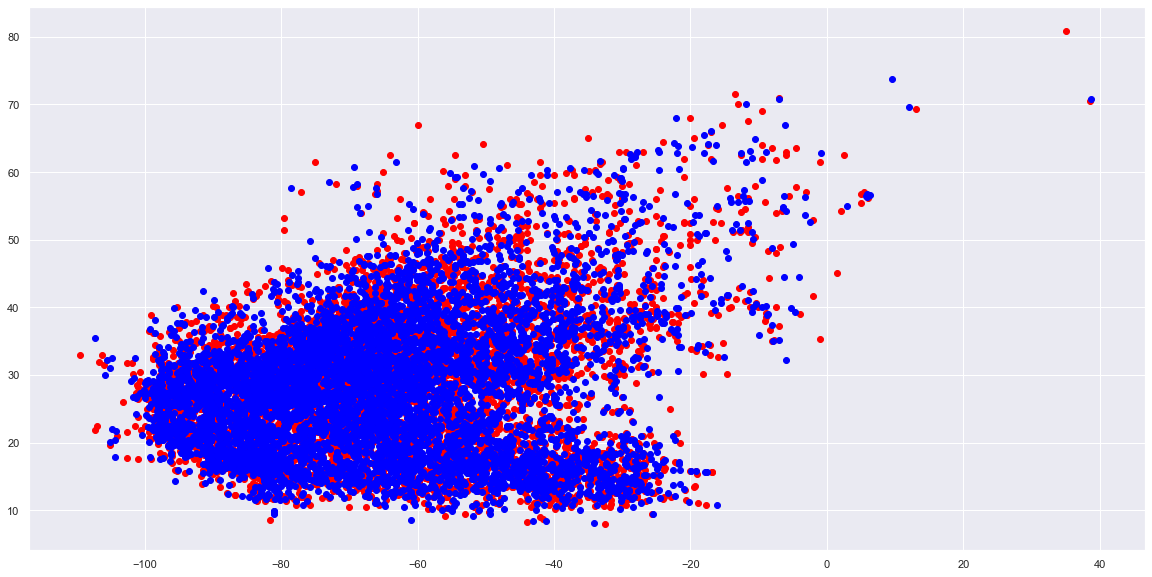

In [615]:
 plt.figure(figsize=(20,10))
plt.scatter(y_test[:,0],y_test[:,1], color = 'blue')
plt.scatter(rf_lon_pred, rf_lat_pred, color = 'red')

##### Prediction for particular storm

Next I tried to use the model for particular storm. The longest storm in terms of time had been chosen 

Find and filter longest strom from the working dataset

In [776]:
max_duration = max(dataset["cumulative_hours"])
storm_id = dataset[dataset["cumulative_hours"]==max_duration]['ID'].values[0]
storm = full_working_series[full_working_series['ID(t)']==storm_id]


Get values for the model

In [869]:
storm_regression_data = storm.filter(regex="cumulative|Lat|Lon",axis=1)
storm_regression_data = storm_regression_data[storm_regression_data.columns.sort_values(ascending=False).values]

In [870]:
storm_X = storm_regression_data.iloc[:,[0,1,2,3,4,6,7,8,9,10,12,13,14,15,16]].values

Scale variables

In [871]:
storm_X = sc_x.transform(storm_X)

Predict latitude and longitude

In [872]:
storm_lon_pred = rf_regressor_lon.predict(storm_X)
storm_lat_pred = rf_regressor_lat.predict(storm_X)

Scale latitude and longitude variables back

In [873]:
storm_lon_pred  = sc_y_lon.inverse_transform(storm_lon_pred)
storm_lat_pred  = sc_y_lat.inverse_transform(storm_lat_pred)

In [1191]:
m = Map(
    location=[30, -60],
    zoom_start=5,
    tiles='Stamen Terrain'
)

Create feature group with real values

In [1192]:
fg_sr=FeatureGroup(name="storm real")
for lat,lon in zip(storm['Lat(pt+1)'],storm['Lon(pt+1)']):
    fg_sr.add_child(vector_layers.CircleMarker(location=[lat,lon],radius=2, color='blue'))

Create feature group with predicted values

In [1193]:
fg_sp=FeatureGroup(name="storm predicted")
for lat,lon in zip(storm_lat_pred,storm_lon_pred):
    fg_sp.add_child(vector_layers.CircleMarker(location=[lat,lon],radius=2, color='red'))

Add groups to the map. Actual values - blue, predicted values - red

In [1194]:
fg_sr.add_to(m)
fg_sp.add_to(m)

Although some predictions values of position for the next 6 hours looks not so exciting, general predicted track looks quite accurate.   

In [1195]:
m

Mean squared error is way smaller than for the whole test set. But, it is also could be because some of the storm's observation were in initial model's train set. 

In [1087]:
storm_rmse_lon = math.sqrt(mean_squared_error(storm['Lon(pt+1)'], storm_lon_pred))
storm_rmse_lat = math.sqrt(mean_squared_error(storm['Lat(pt+1)'], storm_lat_pred))
storm_rmse_lat,storm_rmse_lon

(0.33720085398646893, 0.7959958309136149)

### Deep Learning

Create dataset for Deep Learning model

In [1001]:
dl_regression_data = full_working_series.filter(regex="cumulative|Lat|Lon",axis=1)
dl_regression_data = dl_regression_data[regression_data.columns.sort_values(ascending=False).values]

Split to train and test data

In [1002]:
X = dl_regression_data.iloc[:,[0,1,2,3,4,6,7,8,9,10,12,13,14,15,16]].values
y = dl_regression_data.iloc[:,[11,17]].values

In [1003]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Scale variables

In [1005]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(y_train)

In [960]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Create neural network. Several solutions were tested, the best performance achieved with two hidden layers and 150 epochs.
Input layer consists of 15 nodes - one for each independent variable. Two hidden layers consist of 8 nodes, calculated as average of input and output. Output layer has 2 nodes - number of dependent variables. The rectifier function was used as activation function in both hidden layers, linear function was used for output layer. Loss function for the regression type is mean square error. Network valuation metric was mean squared error. With such architecture the network during the best run converged at around epoch 319 with MSE value 0.0110

In [1137]:
# Initialising the ANN
dl_regressor = Sequential()

# Add the input layer and the first hidden layer
dl_regressor.add(Dense(units = 8, kernel_initializer = 'normal', activation = 'relu', input_dim = 15))

# Add the second hidden layer
dl_regressor.add(Dense(units = 8, kernel_initializer = 'normal', activation = 'relu'))

# Add the output layer
dl_regressor.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'linear'))

# Compile the ANN
dl_regressor.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

Fit the model

In [1138]:
dl_regressor.fit(X_train, y_train, batch_size = 10, epochs = 250)

Epoch 1/250
26136/26136 [==============================] - 3s 100us/step - loss: 0.0891 - mse: 0.0891
Epoch 2/250
26136/26136 [==============================] - 2s 94us/step - loss: 0.0244 - mse: 0.0244: 1s - loss
Epoch 3/250
26136/26136 [==============================] - ETA: 0s - loss: 0.0188 - mse: 0.0188- ETA: 1s - loss: 0.0194 - ms - ETA: 1s - loss: - ETA: 0s - loss: 0.0189 - mse: 0.0 - 2s 90us/step - loss: 0.0188 - mse: 0.0188
Epoch 4/250
26136/26136 [==============================] - 3s 100us/step - loss: 0.0170 - mse: 0.0170
Epoch 5/250
26136/26136 [==============================] - 3s 104us/step - loss: 0.0165 - mse: 0.0165
Epoch 6/250
26136/26136 [==============================] - 3s 114us/step - loss: 0.0163 - mse: 0.0163
Epoch 7/250
26136/26136 [==============================] - 3s 124us/step - loss: 0.0161 - mse: 0.0161
Epoch 8/250
26136/26136 [==============================] - 3s 111us/step - loss: 0.0161 - mse: 0.0161
Epoch 9/250
26136/26136 [============================

In [1140]:
dl_regressor.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
26136/26136 [==============================] - 2s 95us/step - loss: 0.0112 - mse: 0.0112: 1s - loss: 0.0109 - mse: 0. - ETA: 0s - loss: 
Epoch 2/100
26136/26136 [==============================] - 2s 95us/step - loss: 0.0111 - mse: 0.0111
Epoch 3/100
26136/26136 [==============================] - 2s 95us/step - loss: 0.0111 - mse: 0.0111: 0s - loss: 0.0112 - mse: 0
Epoch 4/100
26136/26136 [==============================] - ETA: 0s - loss: 0.0111 - mse: 0.0111- ETA: 0s - loss: 0.0110 - mse - 2s 95us/step - loss: 0.0111 - mse: 0.0111
Epoch 5/100
26136/26136 [==============================] - 2s 94us/step - loss: 0.0111 - mse: 0.0111: 1s - loss:
Epoch 6/100
26136/26136 [==============================] - 2s 95us/step - loss: 0.0111 - mse: 0.0111: 0s - loss: 0.0111 
Epoch 7/100
26136/26136 [==============================] - 2s 95us/step - loss: 0.0111 - mse: 0.0111: 2s - loss: - ETA: 0s - loss: 0
Epoch 8/100
26136/26136 [==============================] - ETA: 0s - loss: 0.0112 - 

Predict test values

In [1141]:
y_pred = dl_regressor.predict(X_test)

Scale back predicted values

In [1142]:
y_pred  = sc_y.inverse_transform(y_pred)

**evaluation**

Longitude values are predicted with slightly higher MSE than Random Forest Regression. Latitude values predicted with lower MSE. It is convenient that with DL model can be used to predict both variables.   

In [1143]:
dl_rmse_lon = math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
dl_rmse_lat = math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
dl_rmse_lat, dl_rmse_lon

(1.2119163967823268, 1.8975787423262196)

Actual values - blue, predicted values - red.

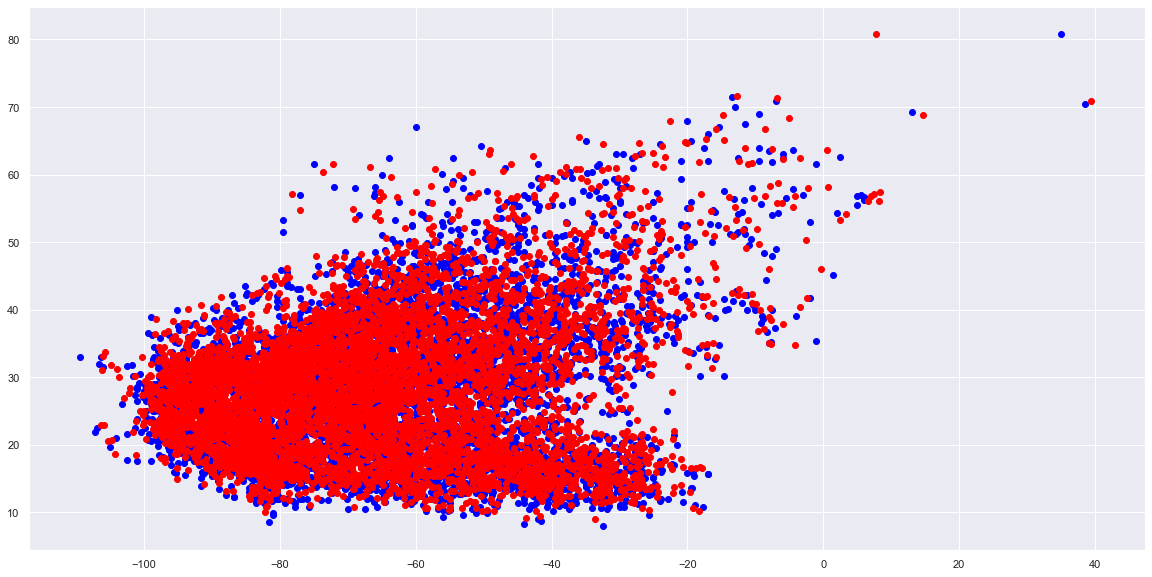

In [1144]:
plt.figure(figsize=(20,10))
plt.scatter(y_test[:,0],y_test[:,1], color = 'blue')
plt.scatter(y_pred[:,0], y_pred[:,1], color = 'red')

##### Prediction for particular storm

Prediction for particular storm with DL appeared to be much worse both visually and in terms of MSE values (actual - blue, predicted - red). Probably the reason of good performance of the ML model is presence of the storm in training set after all.    

In [1145]:
storm_pred = dl_regressor.predict(storm_X)

In [1146]:
storm_pred  = sc_y.inverse_transform(storm_pred)

In [1196]:
m = Map(
    location=[30, -60],
    zoom_start=5,
    tiles='Stamen Terrain'
)

In [1197]:
fg_sr=FeatureGroup(name="storm real")
for lat,lon in zip(storm['Lat(pt+1)'],storm['Lon(pt+1)']):
    fg_sr.add_child(vector_layers.CircleMarker(location=[lat,lon],radius=2, color='blue'))

In [1198]:
fg_sp=FeatureGroup(name="storm predicted")
for lat,lon in zip(storm_pred[:,1],storm_pred[:,0]):
    fg_sp.add_child(vector_layers.CircleMarker(location=[lat,lon],radius=2, color='red'))

In [1199]:
fg_sr.add_to(m)
fg_sp.add_to(m)

In [1200]:
m

In [1165]:
dl_rmse_lon = math.sqrt(mean_squared_error(storm['Lon(pt+1)'], storm_pred[:,0]))
dl_rmse_lat = math.sqrt(mean_squared_error(storm['Lat(pt+1)'], storm_pred[:,1]))
dl_rmse_lat, dl_rmse_lon

(0.9418196870866853, 1.2823543712943368)